In [1]:
import matplotlib 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import json
import pandas
import pandas as pd
import csv
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Luke\Desktop\Fall_2018\505\project_csvs\authorAffil_10_11.csv', encoding='cp1252', dtype='str', error_bad_lines=False)
df.shape

(77604, 4)

In [3]:
del df['Unnamed: 0']

In [4]:
df.columns = ['eid', 'Author_ID', 'Affiliation_ID']

In [5]:
eid = df['eid']

In [6]:
eid.value_counts()

2-s2.0-78651319979    504
2-s2.0-79958143783    179
2-s2.0-79953755048     91
2-s2.0-79955034739     91
2-s2.0-80054973816     91
2-s2.0-77955373370     82
2-s2.0-78049259570     77
2-s2.0-84858593012     70
2-s2.0-84859350703     57
2-s2.0-84911884509     57
2-s2.0-84862908655     54
2-s2.0-79957605208     49
2-s2.0-79952549595     45
2-s2.0-78651312912     45
2-s2.0-77951154173     42
2-s2.0-80053590866     42
2-s2.0-79959937504     41
2-s2.0-80055082475     41
2-s2.0-77956754865     40
2-s2.0-78651323941     40
2-s2.0-78349238940     39
2-s2.0-78751600248     38
2-s2.0-84860389382     37
2-s2.0-84855171902     36
2-s2.0-78649700130     35
2-s2.0-78049441932     34
2-s2.0-84921259211     33
2-s2.0-77149124246     33
2-s2.0-78651300218     33
2-s2.0-79956022110     33
                     ... 
2-s2.0-79960538909      1
2-s2.0-79251558414      1
2-s2.0-76249092474      1
2-s2.0-80052032889      1
2-s2.0-79851513173      1
2-s2.0-77953484176      1
2-s2.0-84861083916      1
2-s2.0-77955

In [8]:
temp = df
aff_cts = []

In [9]:
len(temp.eid)

77604

In [10]:
temp_aff_ct = 1
for x in range(0,len(temp.eid)-1):
    # if the next eid matches, lets see if we have a new affiliation
    if temp.eid[x] == temp.eid[x+1]:
        # if we have a new affiliation, up the counter
        if temp.Affiliation_ID[x] != temp.Affiliation_ID[x+1]:
            temp_aff_ct = temp_aff_ct + 1
    else:
        aff_cts.append(temp_aff_ct)
        temp_aff_ct = 1

In [11]:
aff = pd.Series(aff_cts)

In [12]:
aff.describe()

count    15246.000000
mean         2.952643
std          5.395222
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        504.000000
dtype: float64

In [13]:
aff.value_counts()

1      6853
2      2448
3      2248
4      1135
5       754
6       468
7       339
8       231
9       177
10      121
11       81
12       77
13       56
14       44
16       33
15       29
17       25
18       19
20       14
19       12
21       11
24       11
22       10
27        6
26        5
33        5
23        5
25        4
30        3
29        3
28        3
90        2
36        2
32        1
504       1
48        1
79        1
34        1
35        1
47        1
91        1
38        1
94        1
39        1
43        1
dtype: int64

In [ ]:
for x in range(0,len(aff)):
    if aff[x] == 0:
        print(x)

In [14]:
temp.eid.describe()

count                  77604
unique                 15247
top       2-s2.0-78651319979
freq                     504
Name: eid, dtype: object

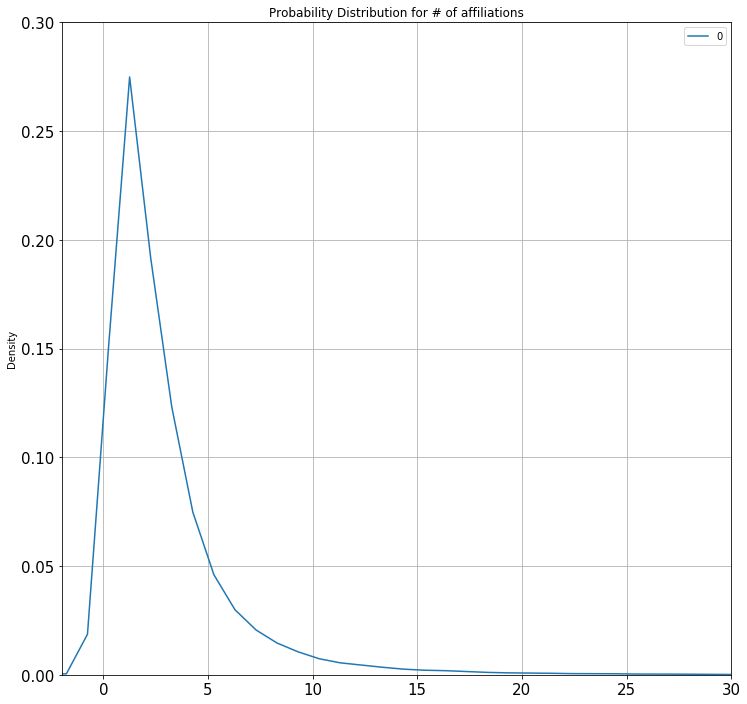

In [21]:
pd.DataFrame(aff).plot(kind="density",  # Plot the distribution
                               figsize=(12,12),
                               fontsize=15.0,
                               xlim=(-2,30),
                               ylim=(0,.3),
                               grid=True,
                               title="Probability Distribution for # of affiliations")

In [ ]:
aff.hist()

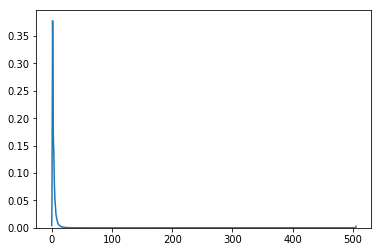

In [19]:
sns.kdeplot(np.array(aff), 
            gridsize=5005,
            bw=.5,)